# EXPLORATION_10_인공지능으로 세상에없던새로운패션만들기

## STEP 1. 작업환경 구성하기

라이브러리 설치를 한 다음! mkdir 을 통해서 작업환경을 구성한다.  
그리고 필요한 라이브러리를 import해준다.

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


## STEP 2. 데이터셋 구성하기

중요한 데이터셋을 가지고 오기!  
아까 위에 작업환경 구성해줄 때 datasets에 들어가있는 것을 불러와서 보기

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [4]:
train_x = (train_x - 127.5) / 127.5   ## 정규화를 위한 작업~
## 이미지를 [-1, 1]로 정규화한다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
## 데이터셋의 shape 을 확인해보기

train_x.shape

(50000, 32, 32, 3)

In [6]:
## 실습과는 다르게 (32,32,3) 이미지로 설정
train_x = train_x.reshape(train_x.shape[0], 32, 32, 3).astype('float32')
train_x.shape

(50000, 32, 32, 3)

첫 번째 데이터를 꺼내서 어떻게 생겼는지 확인해보기  
근데 이게 뭔지 모르겠다.. 양초? 뭐야 ,,,,ㅎㅎ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


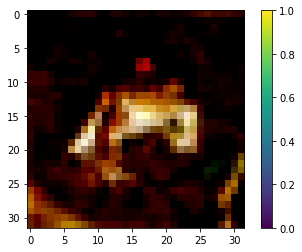

In [7]:
plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

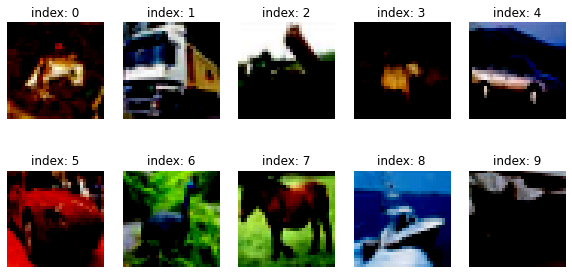

In [8]:
## 데이터 10개 꺼내서 확인해보기! (index0부터 9까지!)

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

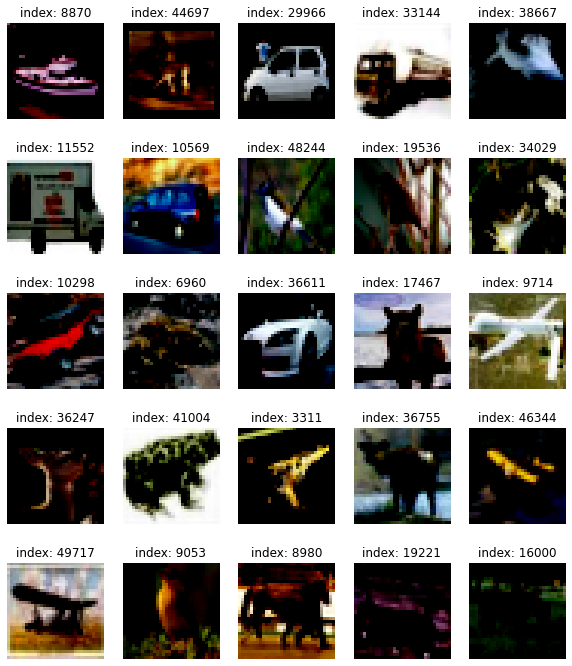

In [9]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index].reshape(32, 32, 3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

-------------------------데이터 전처리 완료-------------------------

In [10]:
BUFFER_SIZE = 50000     ## BUFFER_SIZE 를 50,000으로 설정해준다
BATCH_SIZE = 256        ## BATCH_SIZE 는 한 번에 학습할 데이터 양이다!

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## STEP 3. 생성자 모델 구현하기

모델 구현은 Keras Sequential API 를 활용한다.

In [12]:
def make_generator_model():
    ## Start
    model = tf.keras.Sequential()

    ## First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    ## Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    ## Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    ## Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    ## Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [13]:
## make_generator_model() 이라는 함수를 만들어서 언제든 생성자를 생성할 수 있도록 해준다.

generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

위에 최종 사이즈를 보면 우리가 원하던 (32, 32, 3) 으로 준비한 데이터셋과 형상이 동일 한 것을 볼 수 있다.

In [14]:
## tf.random.normal 을 활용해서 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터를 만들 수 잇다.

noise = tf.random.normal([1, 100])

In [15]:
generated_image = generator(noise, training=False) ## 지금은 학습중이 아니니까 training=False를 설정
generated_image.shape

TensorShape([1, 32, 32, 3])

위에 사이즈를 보면 잘 되었다는 것을 알 수 있다!!!!!!!!!!!!!!!

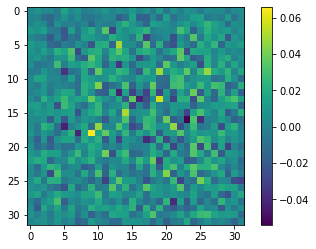

In [16]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

## STEP 4. 판별자 모델 구현하기

### 판별자는 가짜이비지와 진짜 이미지를 입력받으면 각 이미지별로  
### "진짜라고 판단하는 정도" 값을 출력해야한다.

판별자 또한 make_discriminator_model() 함수로 구현한다.

In [73]:
def make_discriminator_model():

    ## Start
    model = tf.keras.Sequential()

    ## First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    ## Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    ## Third: Flatten Layer
    model.add(layers.Flatten())

    ## Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [74]:
## 변수 이름을 생성하고 모델 세부내용 확인~

discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

위에 코드를 마크다운 달다가 모르고 ,,,, 컨트롤 엔터를 눌러서 위위에 코드 다시 실행하고 해서... 순서가 뒤죽박죽,,,바보,,,,

In [19]:
## 아까 생성한 가짜 이미지를 판별자에 입력시켜서 결과 확인!

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00210456]], dtype=float32)>

결과를 보니까 텐서플로우 형태인 tf로 잘 출력이 된 것을 볼 수 있다.

## STEP 5. 손실함수와 최적화 함수 구현하기

GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용한다.  
교차 엔트로피는 앞서 분류 모델을 설계할 때 많이 사용했던 손실함수이다.

- 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것  
- 판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것

In [20]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_loss  
generator_loss 는 fake_output 가 1에 가까워지기를 바래서  
교차 엔트로피값을 계산하면 된다.

In [21]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

discriminator_loss  
위에 generator_loss와는 달리, discriminator_loss 는 real_output 값이 1에 가까워지기를 fake_output 가 0에 가까워지기를 바래서 => 두 가지 loss 값을 모두 계산!


In [22]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

discriminator accuracy  
한편, 판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산해 보는 것도 GAN의 학습에서 매우 중요하다.

In [23]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

최적화 함수(optimizer)

In [24]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4)

In [25]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

## STEP 6. 훈련과정 상세 기능 구현하기

In [26]:
@tf.function
def train_step(images):  ##(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  ##(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  ##(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  ##(4) generated_images 생성

        ##(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        ##(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        ##(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    ##(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    ##(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  ##(10) 리턴값

-(1) 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음  
-(2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함  
-(3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기  
-(4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성  
-(5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력  
-(6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산  
-(7) accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산  
-(8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산  
-(9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신  
-(10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

In [27]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        ##plt.imshow(predictions[i, :, :, 0])
        np_generated = predictions[i].numpy()
        np_generated = (np_generated * 127.5) + 127.5   ## reverse of normalization
        np_generated = np_generated.astype(int)
        plt.imshow(np_generated)
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    ## matlab 차트의 기본 크기를 15,6으로 지정해준다.

def draw_train_history(history, epoch):
    ## summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    ## summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    ## training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장한다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [29]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## STEP 7. 학습 과정 진행하기

In [30]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

## STEP 8. GAN 훈련 과정 개선하기

### 1. epochs 을 기본인 50으로 해서 학습시켜보기!

In [31]:
save_every = 5
EPOCHS = 50

## 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

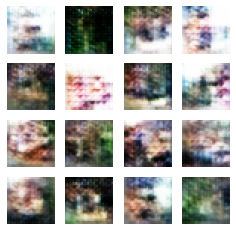

Time for training : 722 sec


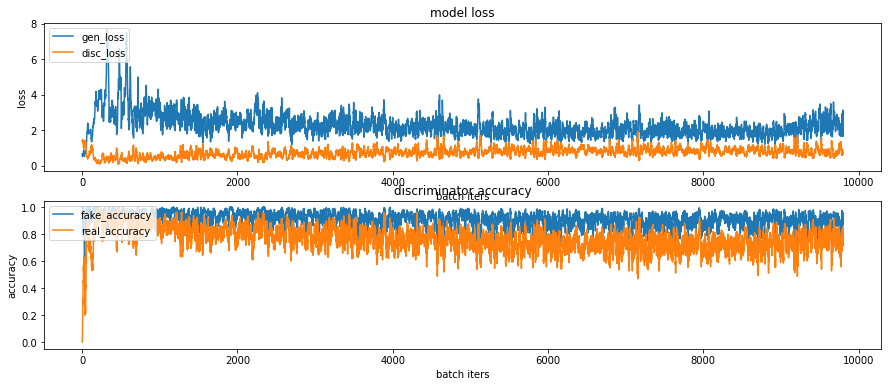

CPU times: user 12min 37s, sys: 1min 5s, total: 13min 43s
Wall time: 12min 3s


In [32]:
%%time
train(train_dataset, EPOCHS, save_every)



In [66]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples3/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif

-rw-r--r-- 1 root root 26441 Feb 15 13:35 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif


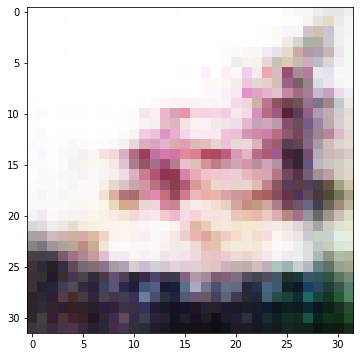

In [35]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

## 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 본다.
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   ## reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  ## 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것이다.

### 일단 epochs을 50으로 했을 때 결과 값 보기!  
### (1). 오브젝트의 종류를 육안으로 구별해보기 쉽지 않다.  
### (2). fake accuracy 가 조금 떨어지기는 했지만! 아주 쪼오금 떨어져서 하향은 했지만 크게 다른 점은 없는 것 같다. 0에 가까워야하는데 1에 가깝다고 할 수 있다.
### (3). 이미지가 전체적으로 흐리멍텅해서 epochs 값을 올려서 다시 해봐야겠다.!

----------------------------------------------------------

### 2. epochs 을 좀 더 높여서 200으로 해서 학습시켜보기!

In [36]:
save_every = 5
EPOCHS = 200

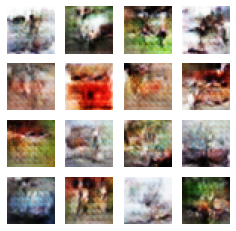

Time for training : 3016 sec


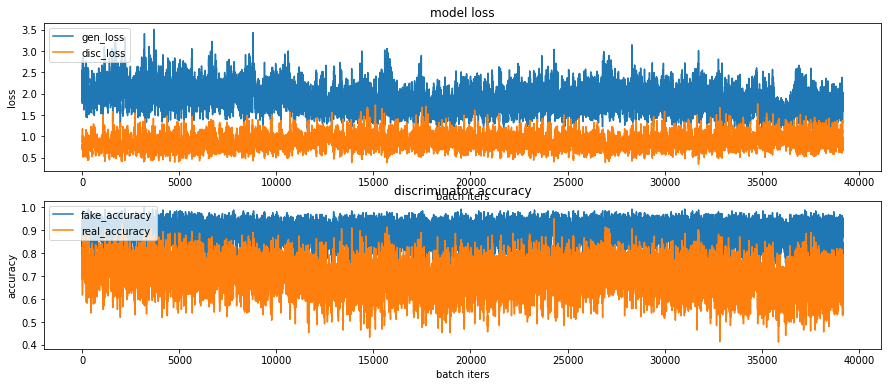

CPU times: user 52min 37s, sys: 4min 24s, total: 57min 2s
Wall time: 50min 19s


In [37]:
%%time
train(train_dataset, EPOCHS, save_every)

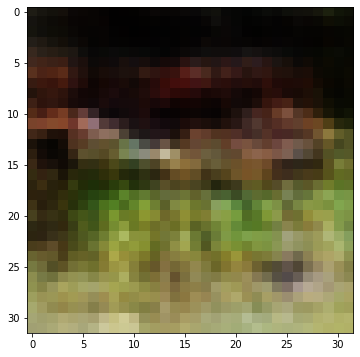

In [38]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

## 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 본다.! 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  ## 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것이다.

###  epochs을 200으로 높였을 때 결과 값 보기!  
### (1). epochs을 높였지만 오브젝트의 종류를 육안으로 구별해보기 쉽지 않다.  
### (2). fake accuracy 가 epochs 50보다는 하향하고 있는 것이 육안으로 보이지만,  최하점이 0.7로 크게 낮아지지는 않고 있는 것이 확인 된다. 0에 가깝게 가야하니까 조금 더 떨어지게 해야겠다. 
### (3). 150이나 epochs을 높였지만 아직까지 이미지를 눈으로 확인이 어려워서 epochs을 더 높여서 학습 시켜봐야겠다!

----------------------------------------------------------

### 3. epochs 을 500으로 해서 학습시켜보기!

In [39]:
save_every = 5
EPOCHS = 500

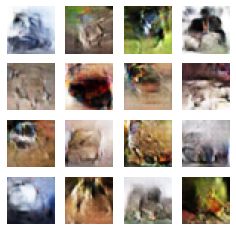

Time for training : 8182 sec


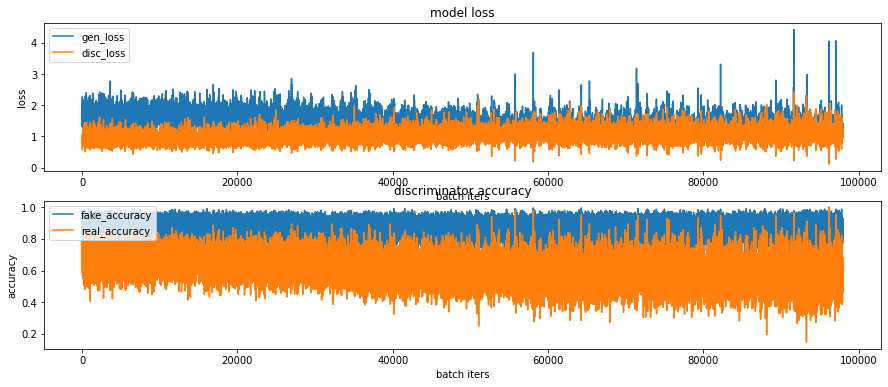

CPU times: user 2h 22min 1s, sys: 11min 13s, total: 2h 33min 14s
Wall time: 2h 16min 27s


In [40]:
%%time
train(train_dataset, EPOCHS, save_every)

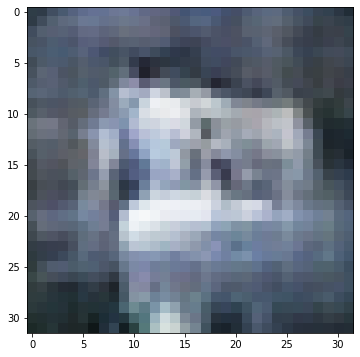

In [43]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

## 로드한 모델이 정상적으로 이미지를 생성하는지 확인
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  
## 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것이다.

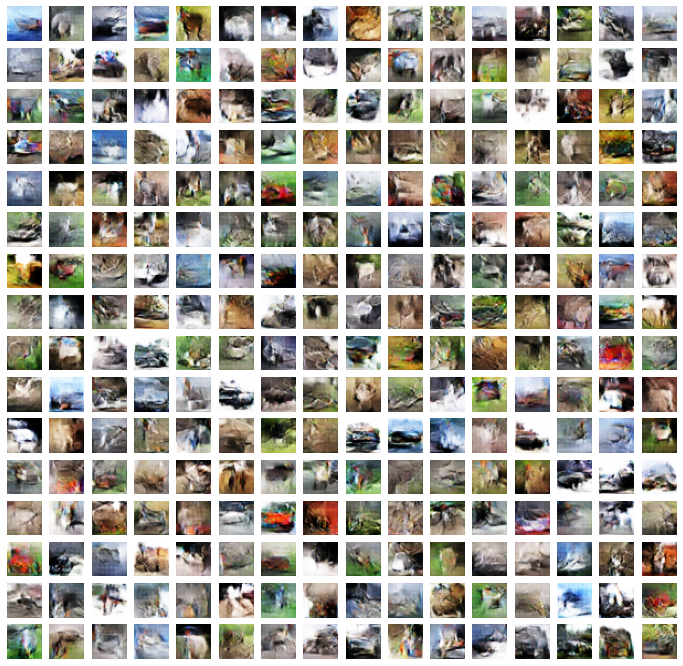

In [44]:
plt.figure(figsize=(12, 12))

for i in range(256):
    plt.subplot(16, 16, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()

### epochs을 500으로 했을 때 결과 값 보기!  
### (1). epochs을 확 올렸더니 결과값이 확실히 차이가 나는 것을 볼 수 있다.
### (2). fake accuracy 가 하향을 하고는 있는데 아까 epochs을 200으로 설정했을 때보다 더 차이가 나지 않는 것 같아서 모델을 개선해야겠다.  
### (3). 이미지가 전체적으로 어떤 물체인지 확인이 되고 있지만 아직까지 아쉬운 부분이 많아서 모델을 개선해서 더 좋은 결과를 얻어봐야겠다!

----------------------------------------------------------

### 4.  모델 개선

### 일단 epochs 만을 단순히 증가시켜서 될 문제가 아니라고 생각을 해서 위에 쓰던 모델을 조금 달리 해보았다.

In [23]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


In [24]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [25]:
train_x = (train_x - 127.5) / 127.5 ## 이미지를 [-1, 1]로 정규화

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [26]:
train_x = train_x.reshape(train_x.shape[0], 32, 32, 3).astype('float32')
train_x.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


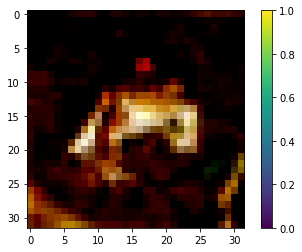

In [27]:
plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

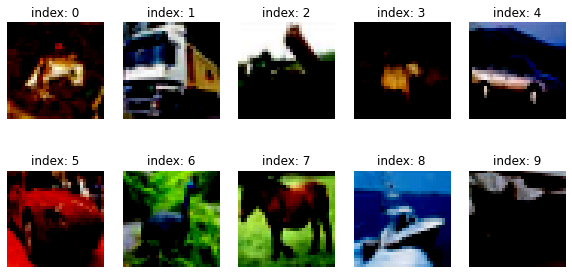

In [28]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

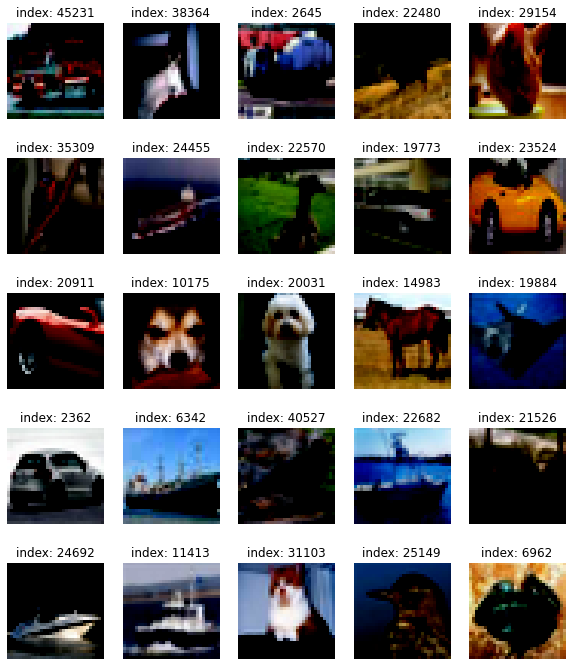

In [29]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index].reshape(32, 32, 3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

In [30]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [31]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### 추가로 layer들을 쌓아줘서 깊은 신경망을 만들어줬다.

In [32]:
def make_generator_model_3():
    ## Start
    model = tf.keras.Sequential()

    ## First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    ## Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    ## Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    ## Conv2DTranspose layer 를 추가로 생성하기!!!!
    model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    ## Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    ## Conv2DTranspose layer 를 추가로 생성하기!!!!
    model.add(layers.Conv2DTranspose(64, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    ## Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(4, 4), strides=(1, 1), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [33]:
generator = make_generator_model_3()

generator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_25 (Batc (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 16384)             0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 8, 8, 128)         524288    
_________________________________________________________________
batch_normalization_26 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 8, 8, 128)        

In [34]:
noise = tf.random.normal([1, 100])

In [35]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

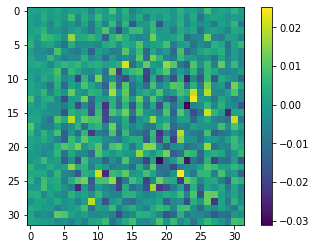

In [36]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

In [37]:
def make_discriminator_model_3():

    ## Start
    model = tf.keras.Sequential()

    ## First: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    ## Second: Conv2D Layer
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    ## Third: Flatten Layer
    model.add(layers.Flatten())

    ## Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [38]:
discriminator = make_discriminator_model_3()

discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 128)       9728      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [39]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00095871]], dtype=float32)>

In [40]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [41]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [42]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [43]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### learning rate를 위에서는 2e-4로 설정했는데 반대로 낮게 1e-3으로 변경해보았다.

In [44]:
generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3)

In [45]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [46]:
@tf.function
def train_step(images):  ##(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  ##(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  ##(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  ##(4) generated_images 생성

        ##(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        ##(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        ##(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    ##(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    ##(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  ##(10) 리턴값

In [47]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        ## plt.imshow(predictions[i, :, :, 0])
        np_generated = predictions[i].numpy()
        np_generated = (np_generated * 127.5) + 127.5   ## reverse of normalization
        np_generated = np_generated.astype(int)
        plt.imshow(np_generated)
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [48]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    ## matlab 차트의 기본 크기를 15,6으로 지정해 준다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    ## summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    ## training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [51]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [52]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

### epochs을 500으로 설정해줘서 학습을 빡!!!시켜줬다.  
### 모델을 바꿔주니까 학습 시간도 어마무시하게 걸림...ㅠ

In [53]:
save_every = 5
EPOCHS = 500

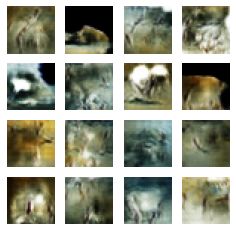

Time for training : 16780 sec


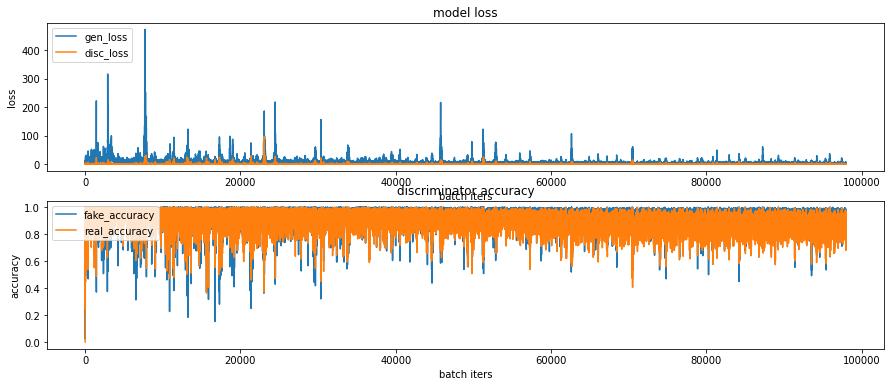

CPU times: user 4h 42min 30s, sys: 10min 51s, total: 4h 53min 22s
Wall time: 4h 39min 46s


In [54]:
%%time
train(train_dataset, EPOCHS, save_every)

In [70]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples3/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif

-rw-r--r-- 1 root root 26441 Feb 15 13:37 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif


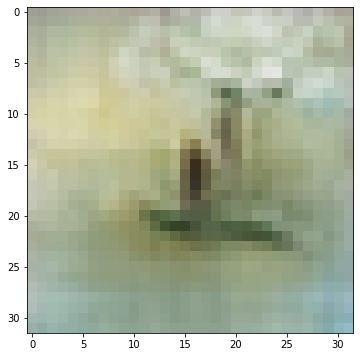

In [59]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

## 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 본다.
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   ## reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  ## 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것이다.

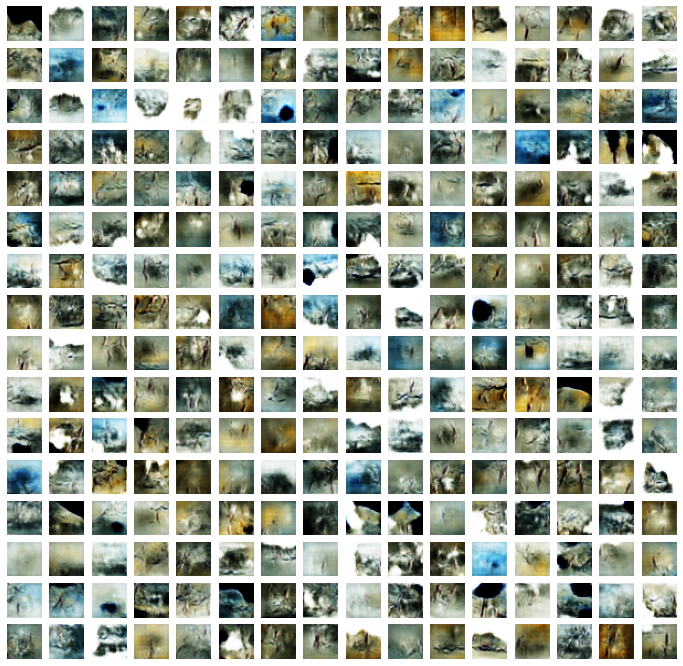

In [60]:
plt.figure(figsize=(12, 12))

for i in range(256):
    plt.subplot(16, 16, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()

###  모델을 바꿔봤을 때 결과 분석  
### (1). 육안으로 봤을 때 약간 사슴? 같은 동물 같은데 3번째보다 사진 결과값이 잘 못나온 것 같다.
### (2). fake accuracy 초반에 보면 0.2까지 떨어졌고 후에도 0.5로 떨어진 것을 확인 가능함
### (3). 초반에  fake accuracy가 엄~청 떨어졌다가 얼마이상에는 또 올라갔는데 이게 모델을 변경한게 효과는 있었는데 후에 조금 상승했던 점을 보면 보완이 필요한 것 같다.  
### (4). 하지만! 앞에 3가지 결과보다는  fake accuracy가 평균 0.5로 많이 하락했던 것으로 확인된다.  
### (5). 근데 마지막 사진 결과값을 보니까 색 합성이 잘못되어 색상은 3번째 결과가 좀 더 좋아서 뭔가를 잘못 건들인거 같은데... epochs돌린다고 수정을 하지 못해서 아쉽다..

----------------------------------------------------------

# 회고!

## < 어려웠던 점>  
처음에는 노드를 따라하면서 하다가 프로젝트를 하니까 색상을 변경하는게 마냥 쉽지는 않았던 것 같다. 그리고 epochs 이전과는 다르게 시간이 어마무시하게 걸려서 학습을 켜두고 자는 건 처음이었는데 그게 힘들었던 것 같다. 그리고 뭔가 눈에 확 보여서 그런가 더 잘 나왔으면 좋겠다는 마음이 컸던 것 같다. 하지만 색상이 자꾸 꾸리꾸리하게 나와서 수정하고 수정하고 했는데 마지막에 모델을 건들이면서 이상하게 되어서 또 꾸리꾸리하게 나와서 힘들었다.

## < 알아낸 점> & < 아직까지 모호한 점>  
으음 일단 cs231n을 배우고 나니까 모델을 변경하거나 learning rate 변경하는게 눈에 들어오기 시작했다. 그래서 솔직히 조금만 변경해봐도 너무 신기했던 것 같다. 원래 accuracy만 있는 줄 알았는데 fake accuracy랑 real accuracy 를 알게 되었다. 루브릭에는 0.5를 향해서 가면 된다고 해서 그러면 좋은 건가 싶어서 찾아보고 두 개에 대해서 알게 되엇다!

## <시도한 것들>  
이건 위에 각각 결과 뒤에 적어 둔 것 참고  
 ### <일단 epochs을 50으로 했을 때 결과 값 보기!  >
 (1). 오브젝트의 종류를 육안으로 구별해보기 쉽지 않다.  
 (2). fake accuracy 가 조금 떨어지기는 했지만! 아주 쪼오금 떨어져서 하향은 했지만 크게 다른 점은 없는 것 같다. 0에 가까워야하는데 1에 가깝다고 할 수 있다.
 (3). 이미지가 전체적으로 흐리멍텅해서 epochs 값을 올려서 다시 해봐야겠다.  
 
 ###  <epochs을 200으로 높였을 때 결과 값 보기!  >
 (1). epochs을 높였지만 오브젝트의 종류를 육안으로 구별해보기 쉽지 않다.  
 (2). fake accuracy 가 epochs 50보다는 하향하고 있는 것이 육안으로 보이지만,  최하점이 0.7로 크게 낮아지지는 않고 있는 것이 확인 된다. 0에 가깝게 가야하니까 조금 더 떨어지게 해야겠다. 
 (3). 150이나 epochs을 높였지만 아직까지 이미지를 눈으로 확인이 어려워서 epochs을 더 높여서 학습 시켜봐야겠다.  
 
 ###  epochs을 500으로 했을 때 결과 값 보기!  
 (1). epochs을 확 올렸더니 결과값이 확실히 차이가 나는 것을 볼 수 있다.
 (2). fake accuracy 가 하향을 하고는 있는데 아까 epochs을 200으로 설정했을 때보다 더 차이가 나지 않는 것 같아서 모델을 개선해야겠다.  
 (3). 이미지가 전체적으로 어떤 물체인지 확인이 되고 있지만 아직까지 아쉬운 부분이 많아서 모델을 개선해서 더 좋은 결과를 얻어봐야겠다.  
 
 ###  <모델을 바꿔봤을 때 결과 분석  >
 (1). 육안으로 봤을 때 약간 사슴? 같은 동물 같은데 3번째보다 사진 결과값이 잘 못나온 것 같다.
 (2). fake accuracy 초반에 보면 0.2까지 떨어졌고 후에도 0.5로 떨어진 것을 확인 가능함
 (3). 초반에  fake accuracy가 엄~청 떨어졌다가 얼마이상에는 또 올라갔는데 이게 모델을 변경한게 효과는 있었는데 후에 조금 상승했던 점을 보면 보완이 필요한 것 같다.  
 (4). 하지만! 앞에 3가지 결과보다는  fake accuracy가 평균 0.5로 많이 하락했던 것으로 확인된다.  
 (5). 근데 마지막 사진 결과값을 보니까 색 합성이 잘못되어 색상은 3번째 결과가 좀 더 좋아서 뭔가를 잘못 건들인거 같은데... epochs돌린다고 수정을 하지 못해서 아쉽다..

## < 자기 다짐>  
뭔가 프로젝트를 할 때마다 코드를 못 알아들어서 답답할 때가 많았는데 cs231n 강의와 딥러닝 교과서를 보고나니까 뭔가 아 그때 그게 그거였구나ㅏ 하는 것이 많아서 그냥 쫌 더 열심히 공부해야겠다는 생각이 들었다. 그래서 cs231n 강의를 다시 정리중인데 조금 천천히라도 이해하면서 공부를 해야겠다고 생각했다. 그래야..흥미가 생기는거 같다..화..이..팅!